### 


In [1]:
import requests
import json
import matplotlib.pyplot as plt

# Set the base URL for the REST server
host = '## ADD YOUR HOST HERE ##'

#Parameters you can change 
start_timestamp = 1673687802131
end_timestamp = 1673687826370

Monitored devices: {'mac_addresses': ['0xd1b389213477', '0xd05099a8ae93']}
mac address of the device: 0xd1b389213477
mac address of the device: 0xd05099a8ae93


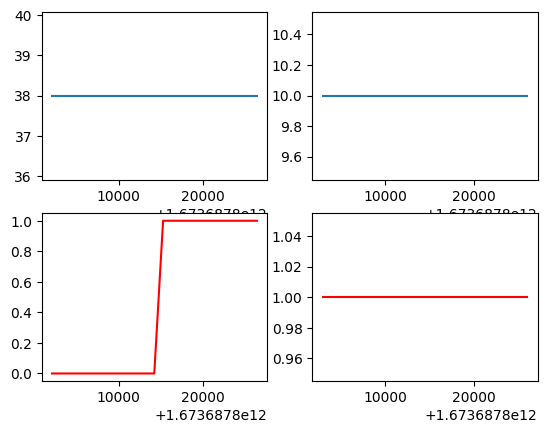

<Response [200]>

In [2]:
# 1. Retrieve and print the list of monitored devices
response = requests.get(host + '/devices')
if response.status_code == 200:
    devices = json.loads(response.text) # response text is a dict but passed as a str, loading with json converts to dict
    print(f'Monitored devices: {devices}')
else:
    print('exiting 1')
    exit()

# 2. For each device, retrieve the battery status from a given time range and plot the battery level over time
nmacs = len(devices['mac_addresses'])
i = 1
for mac in devices['mac_addresses']:
    print('mac address of the device: ' + mac)
    # Make a GET request to the /status endpoint to retrieve the battery status for the specified time range
    # Specify the request query parameters with the "params" argument of the get method.
    payload = {"from": start_timestamp, "to": end_timestamp}
    response = requests.get(host + f'/device/{mac}', params=payload)

    if response.status_code == 200:
        battery_status = json.loads(response.text)
        # Extract the timestamps and battery levels from the response
        timestamps = battery_status['timestamps']
        battery_levels = battery_status['battery_levels']
        power_plugged = battery_status['power_plugged']

        # Plot the battery levels over time
        
        plt.subplot(nmacs, 2, i)
        plt.plot(timestamps, battery_levels)
        plt.subplot(nmacs, 2, i+nmacs)
        plt.plot(timestamps, power_plugged, color='red')
        i = i+1
    else:
        print('exiting 2')
        exit()

plt.show()

# 3. Delete the data of the last device in the device list
last_device = devices['mac_addresses'][-1]
requests.delete(host + f'/device/{last_device}')


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f6729a98-a1be-4c88-8020-81eb03e99821' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>